In [2]:
import numpy as np

# from utils.normalization import normalize
# from utils.segmentation import create_segmented_and_variance_images
# from utils.orientation import calculate_angles
# from utils.frequency import ridge_freq
# from utils.gabor_filter import gabor_filter
# from utils.skeletonize import skeletonize

import cv2
import matplotlib.pyplot as plt

import glob, os

In [3]:
def extract_label(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

def extract_label_altered(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _, _ = etc.split('_')
    
    gender = 0 if gender == 'M' else 1
    lr = 0 if lr =='Left' else 1
    
    if finger == 'thumb':
        finger = 0
    elif finger == 'index':
        finger = 1
    elif finger == 'middle':
        finger = 2
    elif finger == 'ring':
        finger = 3
    elif finger == 'little':
        finger = 4
        
    return np.array([subject_id, gender, lr, finger], dtype=np.uint16)

In [4]:
# def fingerprint_pipeline(img):
#     block_size = 16
#     normalized_img = normalize(img.copy(), float(100), float(100))
#     (segmented_img, normim, mask) = create_segmented_and_variance_images(normalized_img, block_size, 0.2)
#     angles = calculate_angles(normalized_img, W=block_size, smoth=False)
#     freq = ridge_freq(normim, mask, angles, block_size, kernel_size=5, minWaveLength=5, maxWaveLength=15)
#     gabor_img = gabor_filter(normim, angles, freq)
#     #thin_image = skeletonize(gabor_img)
#     return gabor_img

In [5]:
def numpy_data_gen_real(imgList, xFileName, yFileName):
    print(len(imgList))
    imgs = np.empty((len(imgList), 90, 90, 1), dtype=np.uint8)
    labels = np.empty((len(imgList), 4), dtype=np.uint16)

    for i, img_path in enumerate(imgList):
        if i % 1000 == 0: print(i)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (90, 90))
        img = np.expand_dims(img, axis=-1)
        imgs[i] = img
        labels[i] = extract_label(img_path)

    np.savez(rf'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\{xFileName}.npz', imgs)
    np.save(rf'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\{yFileName}.npy', labels)

def numpy_data_gen_altered(imgList, xFileName, yFileName):
    print(len(imgList))
    imgs = np.empty((len(imgList), 90, 90, 1), dtype=np.uint8)
    labels = np.empty((len(imgList), 4), dtype=np.uint16)

    for i, img_path in enumerate(imgList):
        if i % 1000 == 0: print(i)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (90, 90))
        img = np.expand_dims(img, axis=-1)
        imgs[i] = img
        labels[i] = extract_label_altered(img_path)
        

    np.savez(rf'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\{xFileName}.npz', imgs)
    np.save(rf'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\{yFileName}.npy', labels)

    plt.figure(figsize=(1, 1))
    plt.title(labels[-1])
    plt.imshow(imgs[-1], cmap='gray')

In [6]:
# np.savez(r'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\x_real.npz', imgs)
# np.save(r'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\numpy_dataset\y_real.npy', labels)

In [7]:
img_list_real = sorted(glob.glob(r'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\SOCOFing\Real\*.BMP'))
img_list_easy = sorted(glob.glob(r'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\SOCOFing\Altered\Altered-Easy\*.BMP'))
img_list_medium = sorted(glob.glob(r'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\SOCOFing\Altered\Altered-Medium\*.BMP'))
img_list_hard = sorted(glob.glob(r'D:\amrita\sem3\introduction to AI and ML\datasets\dataset_fingerprint\SOCOFing\Altered\Altered-Hard\*.BMP'))

In [8]:
img_list_easy[557]

'D:\\amrita\\sem3\\introduction to AI and ML\\datasets\\dataset_fingerprint\\SOCOFing\\Altered\\Altered-Easy\\117__F_Right_little_finger_Obl.BMP'

In [9]:
numpy_data_gen_real(img_list_real, 'xReal', 'yReal')

6000
0
1000
2000
3000
4000
5000


17931
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


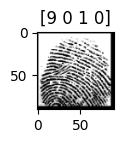

In [15]:
numpy_data_gen_altered(img_list_easy, 'xEasy', 'yEasy')

17067
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000


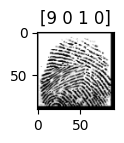

In [16]:
numpy_data_gen_altered(img_list_medium, 'xMedium', 'yMedium')

14272
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000


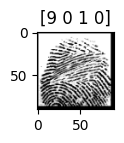

In [12]:
numpy_data_gen_altered(img_list_hard, 'xHard', 'yHard')

In [ ]:
from faker import Faker
import pandas as pd

fake = Faker()

In [ ]:
def extract_label_data(img_path):
    filename, _ = os.path.splitext(os.path.basename(img_path))
    
    subject_id, etc = filename.split('__')
    gender, lr, finger, _ = etc.split('_')
    
    gender = 'Male' if gender == 'M' else 'Female'    
        
    return gender, lr, finger + " finger", subject_id

In [ ]:
def generate_fake_data():
    data = []
    for imgpath in img_list_real:
        gender, lr, finger, id = extract_label_data(imgpath)
        record = {
            'image path' : imgpath,
            'id' : id,
            'name' : fake.name(),
            'gender' : gender,
            'lr' : lr,
            'finger' : finger,
            'dob' : fake.date_of_birth(),
            'country' : fake.country(),
            'phone' : fake.phone_number(),
            'address' : fake.address()
        }
        data.append(record)
    return pd.DataFrame(data)
        

In [ ]:
df = generate_fake_data()
output_filename = r'D:\amrita\sem3\introduction to AI and ML\datasets\fingerprint_fake_dataset.xlsx'
df.to_excel(output_filename, index=False)
print(f'Saved fake data to {output_filename}')

Saved fake data to D:\amrita\sem3\introduction to AI and ML\datasets\fingerprint_fake_dataset.xlsx
